<a href="https://colab.research.google.com/github/rodpmendes/DeepLearning/blob/main/simple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create a dataset with samples from three categories: cofee, tea and water

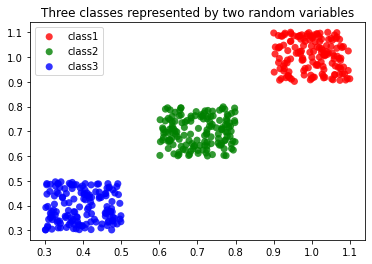

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Create data
N  = 150
c1 = (0.90 + 0.2 * np.random.rand(N), 0.90 + 0.2*np.random.rand(N))
c2 = (0.60 + 0.2 * np.random.rand(N), 0.60 + 0.2*np.random.rand(N))
c3 = (0.30 + 0.2 * np.random.rand(N), 0.30 + 0.2*np.random.rand(N))

data    = (c1, c2, c3)
colors  = ("red", "green", "blue")
classes = ("class1", "class2", "class3")

# Create plot
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

for data, color, classes in zip(data, colors, classes):
    x1, x2 = data
    ax.scatter(x1, x2, alpha=0.8, c=color, edgecolors='none', s=50, label=classes)

plt.title('Three classes represented by two random variables')
plt.legend(loc=2)
plt.show()

### Separate the samples into training and testing sets

In [30]:
def UnisonShuffling(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X = [] 
Y = []
class1_size = len(c1[0])
for i in range(class1_size):
    X.append((c1[0][i],c1[1][i]))
    Y.append((1,0,0)) 
class2_size = len(c2[0])
for i in range(class2_size):
    X.append((c2[0][i],c2[1][i]))
    Y.append((0,1,0))
class3_size = len(c3[0])
for i in range(class3_size):
    X.append((c3[0][i],c3[1][i]))
    Y.append((0,0,1))
nsamples = class1_size + class2_size + class3_size
X = np.array(X)
Y = np.array(Y)
# Apply shuffle and separate training and testing
Xaux = np.copy(X)
Yaux = np.copy(Y)
X, Y = UnisonShuffling(Xaux,Yaux) 
X_train = X[:nsamples//10]
Y_train = Y[:nsamples//10]
X_test  = X[nsamples//10:nsamples]
Y_test  = Y[nsamples//10:nsamples]

### Create a neural network model for classification and train it

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Flatten(input_shape=[2]))
model.add(layers.Dense(4, name='dense1', activation='relu'))
model.add(layers.Dense(3, name='decision', activation='softmax'))

# Comment this part to verify the changes in the model
'''
v       = (2.0**0.5)/2
b1      = ((0.85)**2 + (0.85)**2)**0.5
b2      = ((0.55)**2 + (0.55)**2)**0.5
weights = np.array([[v, -v, v, -v], [v, -v, v, -v]])
bias    = np.array([-b1, b1, -b2, b2])
for layer in model.layers[:-1]: 
    if (layer.name == "dense1"): 
        layer.set_weights([weights, bias])
        layer.trainable=False
'''       
model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(learning_rate=1e-1, momentum=0.9), metrics = 'acc')
model.summary() 
history = model.fit(X_train,Y_train,epochs=10,batch_size=10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense1 (Dense)               (None, 4)                 12        
_________________________________________________________________
decision (Dense)             (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0916 - acc: 0.3111
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9992 - acc: 0.3778
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8667 - acc: 0.6222
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7222 - acc: 0.7556
Epoch 5/10
5/5 [========

### Evaluate the model on the testing set

In [33]:
scores = model.evaluate(X_test, Y_test, verbose=1)

13/13 [==============================] - 0s 1ms/step - loss: 0.1405 - acc: 1.0000


### Verify the weights and bias at a given layer (e.g., dense1, decision)

In [34]:
for layer in model.layers[:]: 
    if (layer.name == "decision"):
        weights = layer.get_weights()[0]
        bias    = layer.get_weights()[1]
        print(weights, bias)

[[ 0.5544061  -0.51632214 -1.1926353 ]
 [-2.2078888   0.25740197  1.8404427 ]
 [ 1.4935101   0.11559059 -2.1985862 ]
 [ 1.6049123   0.05563143 -2.2608888 ]] [-1.4534142  0.5633549  0.8900594]


### Check activations at the output of a given layer (e.g., dense1, decision)

In [35]:
def GetLayerActivations(model, tensor, layer_name):
    # find the index of the given layer_name
    layer_names = [layer.name for layer in model.layers]
    for layer in model.layers:
        if (layer.name == layer_name):
            layer_idx = layer_names.index(layer_name)
            break
    layer_outputs = model.layers[layer_idx].output
    activ_model   = models.Model(inputs=model.input, outputs=layer_outputs)
    activations   = activ_model.predict(tensor)
    return(activations)



In [36]:
example_class1 = [[1.0, 1.0]]
example_class2 = [[0.7, 0.7]]
example_class3 = [[0.4, 0.4]]

activ  = GetLayerActivations(model, example_class2, "decision")
print(activ)

[[0.09683386 0.8028912  0.10027501]]
